In [2]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from alibi.explainers import CEM, CounterfactualProto
import tensorflow as tf
from sklearn.model_selection import train_test_split
import joblib

In [3]:
df = pd.read_csv('anxiety.csv')
X = df.drop('Classes', axis=1)
y = df.iloc[:, -1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [4]:
model = joblib.load('Decision_Tree.joblib')

In [7]:
X.columns

Index(['Q2', 'Q4', 'Q7', 'Q9', 'Q15', 'Q19', 'Q20', 'Q23', 'Q25', 'Q28', 'Q30',
       'Q36', 'Q40', 'Q41'],
      dtype='object')

Feature importance:
Q40: 0.16585795097423006
Q7: 0.1548124869055102
Q28: 0.1507982401005657
Q36: 0.14913471611146029
Q9: 0.13354703540750054
Q20: 0.13337942593756547
Q2: 0.1307647182065787
Q25: 0.12930651581814376
Q30: 0.1254766394301278
Q4: 0.12063272574900483
Q19: 0.10540540540540541
Q41: 0.09829038340666248
Q15: 0.07426775612822126
Q23: 0.057808506180599205


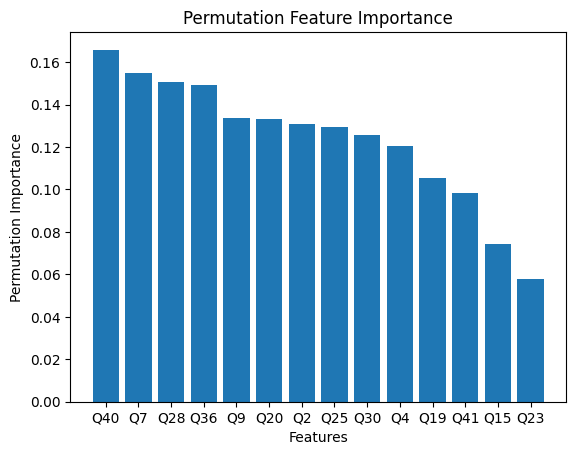

In [10]:
perm_importance = permutation_importance(model, X_test.values, y_test.values, n_repeats=30, random_state=42)
feature_importances = perm_importance.importances_mean
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X.columns
print("Feature importance:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

import matplotlib.pyplot as plt

plt.bar(range(X.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X.shape[1]), [feature_names[idx] for idx in sorted_idx])
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

In [ ]:
tf.compat.v1.disable_eager_execution()
shape = (1, X_train.shape[1])
cem = CEM(model.predict_proba, mode='PP', shape=shape, feature_range=(X_train.values.min(), X_train.values.max()))
explanation = cem.fit(X_train.values, no_info_type='median')

interpret = cem.explain(X_test.iloc[10].values.reshape((1,-1)))
print('Original sample: {}'.format(interpret.X))
print('\nPrediction label:{}'.format([interpret.X_pred]))
print('\nPertinent positive:{}'.format(interpret.PP))
print('\nPredicted label:{}'.format([interpret.PP_pred]))



Original sample: [[1 0 0 0 0 0 0 0 0 0 0 0 1 0]]

Prediction label:[0]

Pertinent positive:[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Predicted label:[0]


In [ ]:
cem = CEM(model.predict_proba, mode='PN', shape=shape, feature_range=(X_train.values.min(), X_train.values.max()))
explanation = cem.fit(X_train.values, no_info_type='median')

interpret = cem.explain(X_test.iloc[0].values.reshape((1,-1)))
print('Original sample: {}'.format(interpret.X))
print('\nPrediction label:{}'.format([interpret.X_pred]))
print('\nPertinent negative:{}'.format(interpret.PN))
print('\nPredicted label:{}'.format([interpret.PN_pred]))

No PN found!


Original sample: [[0 3 0 1 0 1 0 0 0 1 1 0 2 0]]

Prediction label:[0]

Pertinent negative:None

Predicted label:[None]


In [ ]:
count = CounterfactualProto(model.predict_proba, shape=(1, 14), feature_range=(X_train.values.min(), X_train.values.max()), kappa=0., beta=.1, gamma=100., theta=100., c_init=1)
count.fit(X_train.values)
explanation = count.explain(X_test.values[10].reshape((1,-1)))
print("Original Class:{}".format(explanation.orig_class))
print("Counterfactual prediction:{}".format(explanation['cf']))

No counterfactual found!


Original Class:0
Counterfactual prediction:None


C:\Users\Asus\AppData\Local\Temp\ipykernel_12312\3171890518.py:5: DeprecationWarning: The Explanation object is not a dictionary anymore and accessing elements should be done via attribute access. Accessing via item will stop working in a future version.
  print("Counterfactual prediction:{}".format(explanation['cf']))
